In [1]:
import cv2 #pip install opencv-python

In [2]:
import matplotlib.pyplot as plt #pip install matplotlib

In [3]:
config_file =  'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] ## empty list of python
file_name ='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ##mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000002A4BB02AB10>

In [9]:
# read an image

In [10]:
img = cv2.imread('motorbike.jpg')

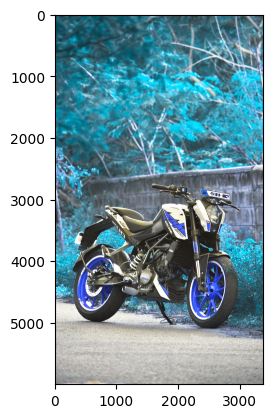

In [11]:
plt.imshow(img) ## bgr

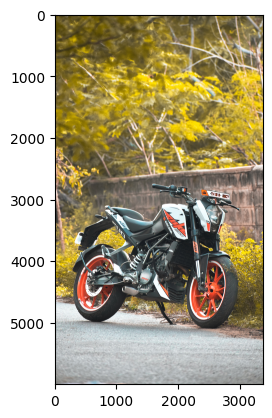

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [14]:
print(ClassIndex)

[4]


In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y),font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img,boxes,(255, 0, 0), 2 )
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

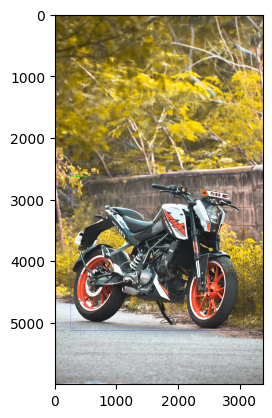

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
cap = cv2.VideoCapture("traffic.mp4")


# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDError("Cannot open video")
    

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0))
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    

[6 1 3 3 3 2 3 1 1 3 3 3]
[6 3 3 1 3 3 1 1 2 3 3 1 3 3]
[3 3 6 3 1 1 2 1 3 3 3 3 1]
[3 3 3 3 3 3 1 6 3 1 2 3 3]
[3 6 3 3 3 3 3 2 1 3 3 3 1 1 1 3]
[3 3 3 6 3 2 3 1 3 1 3 1 3 3]
[3 3 6 3 3 3 1 3 3 1 3 1 1 3 2 3]
[3 6 3 1 3 1 2 3 3 3 3 1 3]
[3 1 3 3 3 3 6 1 3 3 1 3 3]
[1 3 3 6 3 3 1 3 3 3 3]
[1 3 6 3 3 3 3 3 1 3 3 2 3 1]
[1 3 3 6 3 3 3 3 4 1]
[3 1 3 3 3 3 6 3 3 3 3 4 3]
[3 1 3 3 4 3 6 3 3 3 3 3 3 3]
[3 3 1 3 3 3 3 3 3 3 3 4 3]
[1 3 3 3 3 3 3 6 3 3]
[1 3 3 6 3 3 3 3 3 3 3]
[3 1 3 3 3 3 3 6 3 3 3 3]
[3 3 1 3 6 3 3 3 3 3 1]
[3 3 3 1 3 3 3 3 3]
[3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3]
[3 3 3 6 3 3 3 3 3 1 3]
[3 3 6 3 3 3 3 3 3 3]
[3 3 3 3 6 3 3 3 3]
[3 3 3 3 3 3 3 6]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3]
[3 3 3 3 6 3 3]
[3 3 3 3 3 3 3]
[3 3 1 3 3 6]
[3 6 3 4 3 3 3 3 3]
[3 3 6 4 3 3 8]
[6 3 3 4 3 3 3]
[6 3 3 4 3 3 1]
[3 4 6 3 3 3]
[6 3 3 4 3 3]
[3 3 4 6 3]
[3 6 1 1 3 3 3 4 3 3]
[6 1 3 3 3 1]
[3 6 3 1 3 1 3 4 3]
[6 3 4 1 1 3 3 3 8 3 3 3]
[4 3 3 3 3 1 3 1 6 1 3 3]
[4 1 3 3 6 3 1 3 3 1 3 3 8 3]
[4 1 3 3 3 1 6 3

[1 1 1 1 6 3 1]
[1 1 1 1 3]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 3]
[1 1 1]
[1 1 1]
[1 1 3]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1 1 1]
[1 1 3 1 1 1 1]
[1 1 1 3 1 1 1]
[3 1 1 1 6 1 1]
[3 6 1 1 1 1 1 1]
[3 6 1 1 1 1 1 1]
[3 6 1 1 1 1 1 1]
[3 6 1 1 1 1 1]
[3 6 1 1 1]
[3 6 1 1 6 1 1]
[3 6 1 1 6 1 1]
[3 6 1 1 1 1 6]
[6 3 1 1 1]
[6 3 1 1 1 1]
[6 3 1 1 1]
[6 3 1 1 1 1 1]
[6 3 1 1 1 1]
[6 3 1 1 1 1 1]
[6 3 1 1 1 6 1 1]
[6 1 3 1 1 6 1]
[6 3 1 1 1 6 6 1 1 1]
[6 3 1 1 6 1 1 6]
[6 3 1 1 6 6 1 1 6]
[6 3 6 1 1 1 1 1 1 1 6]
[6 3 1 1 6 1 1 1 1 1]
[6 3 1 6 1 1 1]
[6 3 6 1 1 1 1 1 1 6]
[6 3 6 1 1 6]
[6 3 1 6 6 1 1]
[6 1 3 6 1 1 6]
[6 3 1 6 1 1 6]
[6 3 1 1 6 6 1 6 6]
[6 1 1 6 3 1]
[6 1 1 6 1]
[6 6 1 1 1]
[6 6 1 1 1 1]
[6 6 1 1 1 1 1]
[6 1 6 1 1 1 1]
[6 6 1 1 1 1 1]
[6 6 1 1 1 1 1 1]
[6 6 1 1 1 1 1 3]
[6 1 6 1 1 1 1]
[6 6 1 1 1 1 1 6]
[6 6 1 1 1 1 6 1 1 6]
[6 6 1 1 1 6 1 6 1 6]
[6 6 1 1 1 6 6 1 1 3]
[6 1 6 1 1 1 1 6 6]
[6 6 1 1 1 1 1]
[6 6 1 1 1 1 1 1]
[6 6 1 1 1 1 3 1

[6 1 1 1 1 3 1 1]
[6 1 1 1 1 1 3 1]
[6 1 1 1 1 1 3 1]
[6 1 1 1 1 1 1 6 3]
[6 1 1 1 1 1 1 6]
[6 1 1 1 1 1 1 1 6 1]
[6 1 1 1 1 1 1 3 6 1]
[6 1 1 1 1 1 1 3]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 3 1]
[6 1 1 1 1 1 3 1 3 1]
[6 1 1 1 1 1 3]
[6 1 1 1 1 1 6 3]
[6 1 1 1 1 1 6]
[6 1 1 1 1 3 3]
[6 1 1 1 1 3]
[6 1 1 1 1 3 1]
[6 1 1 1 1 3]
[6 1 1 1 1 3 1]
[6 1 1 1 1 1 1]
[6 1 1 1 1 3 1]
[6 1 1 1 3 1 1]
[6 1 1 1 1 1 3]
[6 1 1 1 3 1 1 1 1]
[6 1 1 1 1 3]
[6 1 1 1 1 1]
[6 1 1 1 3 1 1]
[6 1 1 1 1 1 3]
[6 1 1 1 3 1 1]
[6 1 1 1 1 3 1]
[6 1 1 1 3 1]
[6 1 1 1 3 1]
[6 1 1 1 1 1]
[6 1 1 1 3 3]
[6 1 1 1]
[6 1 1 1 1 3]
[6 1 1 1]
[6 1 1 1 3]
[6 1 1 3 1]
[6 1 1 3]
[6 1 1 1 3]
[6 1 1 1 3]
[6 1 1 3 1 1 4 1]
[6 1 1 1 3 1]
[6 1 1 1 3 4 1 1]
[6 1 4 1 1 3 1 1]
[6 1 1 4 1 1 1 1 3 1]
[6 1 1 4 1 1 1 3 1]
[6 1 1 4 1 1 1 3 1]
[6 1 1 4 1 1 1 8 3]
[6 1 1 4 1 3 1 1]
[6 1 1 4 3 1]
[6 1 1 4 3]
[6 1 4 1 3]
[6 1 4 3 1]
[6 1 1 4 3 1]
[6 1 1 3 4 1]
[6 1 3 1 1 1]
[6 1 3 1 1 1 1 1]
[6 1 3 1 1 1 1]
[6 1 3 1 1 1 1]
[6 1 3 1 1]
[6 1 3 1 1 1 1

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
